<center><b>Deep Learning - Basic Neural Net Implementation</b></center><br>

The code below implements a neural network with 2 hidden layers. It contains a hand coded forward pass and backpropagation using gradient tape.


In [1]:
import time
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)
from keras.utils import np_utils

2.1.0


Using TensorFlow backend.


In [2]:
# Prepare dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the training and test data    
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

# reshape the feature data
tr_x = tr_x.reshape(tr_x.shape[0], 784)
te_x = te_x.reshape(te_x.shape[0], 784)

# noramlise feature data
tr_x = tr_x / 255.0
te_x = te_x / 255.0

print( "Shape of training features ", tr_x.shape)
print( "Shape of test features ", te_x.shape)

# one hot encode the training labels and get the transpose
tr_y_hot = np_utils.to_categorical(tr_y,10)
print ("Shape of training labels ", tr_y.shape)

# one hot encode the test labels and get the transpose
te_y_hot = np_utils.to_categorical(te_y,10)
print ("Shape of testing labels ", te_y.shape)

4423680/4422102 [==============================] - 1s 0us/step
Shape of training features  (60000, 784)
Shape of test features  (10000, 784)
Shape of training labels  (60000,)
Shape of testing labels  (10000,)


000: TRAINING Loss: 2.3026 Accuracy: 8.66%. VALIDATION Loss: 2.3026 Accuracy: 8.47%
001: TRAINING Loss: 2.3019 Accuracy: 10.11%. VALIDATION Loss: 2.3019 Accuracy: 9.43%
002: TRAINING Loss: 2.2998 Accuracy: 14.53%. VALIDATION Loss: 2.2998 Accuracy: 13.60%
003: TRAINING Loss: 2.2956 Accuracy: 25.14%. VALIDATION Loss: 2.2955 Accuracy: 24.40%
004: TRAINING Loss: 2.2879 Accuracy: 21.81%. VALIDATION Loss: 2.2877 Accuracy: 22.13%
005: TRAINING Loss: 2.2754 Accuracy: 17.61%. VALIDATION Loss: 2.2750 Accuracy: 18.28%
006: TRAINING Loss: 2.2567 Accuracy: 16.92%. VALIDATION Loss: 2.2559 Accuracy: 17.72%
007: TRAINING Loss: 2.2303 Accuracy: 17.11%. VALIDATION Loss: 2.2291 Accuracy: 17.92%
008: TRAINING Loss: 2.1955 Accuracy: 17.75%. VALIDATION Loss: 2.1937 Accuracy: 18.40%
009: TRAINING Loss: 2.1522 Accuracy: 18.33%. VALIDATION Loss: 2.1497 Accuracy: 18.83%
010: TRAINING Loss: 2.1014 Accuracy: 19.01%. VALIDATION Loss: 2.0982 Accuracy: 19.48%
011: TRAINING Loss: 2.0449 Accuracy: 20.19%. VALIDATION L

096: TRAINING Loss: 0.6017 Accuracy: 78.46%. VALIDATION Loss: 0.6045 Accuracy: 78.33%
097: TRAINING Loss: 0.5979 Accuracy: 78.55%. VALIDATION Loss: 0.6007 Accuracy: 78.28%
098: TRAINING Loss: 0.5958 Accuracy: 78.47%. VALIDATION Loss: 0.5975 Accuracy: 78.32%
099: TRAINING Loss: 0.5925 Accuracy: 78.92%. VALIDATION Loss: 0.5963 Accuracy: 78.63%
100: TRAINING Loss: 0.5885 Accuracy: 78.91%. VALIDATION Loss: 0.5915 Accuracy: 78.60%
101: TRAINING Loss: 0.5858 Accuracy: 79.03%. VALIDATION Loss: 0.5887 Accuracy: 78.68%
102: TRAINING Loss: 0.5833 Accuracy: 79.37%. VALIDATION Loss: 0.5879 Accuracy: 78.97%
103: TRAINING Loss: 0.5797 Accuracy: 79.31%. VALIDATION Loss: 0.5830 Accuracy: 78.90%
104: TRAINING Loss: 0.5764 Accuracy: 79.57%. VALIDATION Loss: 0.5802 Accuracy: 79.17%
105: TRAINING Loss: 0.5739 Accuracy: 79.83%. VALIDATION Loss: 0.5787 Accuracy: 79.25%
106: TRAINING Loss: 0.5710 Accuracy: 79.70%. VALIDATION Loss: 0.5746 Accuracy: 79.43%
107: TRAINING Loss: 0.5676 Accuracy: 80.10%. VALIDATIO

192: TRAINING Loss: 0.4160 Accuracy: 85.56%. VALIDATION Loss: 0.4333 Accuracy: 84.83%
193: TRAINING Loss: 0.4148 Accuracy: 85.51%. VALIDATION Loss: 0.4328 Accuracy: 84.80%
194: TRAINING Loss: 0.4137 Accuracy: 85.66%. VALIDATION Loss: 0.4317 Accuracy: 84.87%
195: TRAINING Loss: 0.4127 Accuracy: 85.64%. VALIDATION Loss: 0.4310 Accuracy: 84.87%
196: TRAINING Loss: 0.4116 Accuracy: 85.72%. VALIDATION Loss: 0.4300 Accuracy: 84.92%
197: TRAINING Loss: 0.4107 Accuracy: 85.73%. VALIDATION Loss: 0.4294 Accuracy: 84.80%
198: TRAINING Loss: 0.4097 Accuracy: 85.72%. VALIDATION Loss: 0.4286 Accuracy: 84.93%
199: TRAINING Loss: 0.4088 Accuracy: 85.77%. VALIDATION Loss: 0.4279 Accuracy: 84.87%
200: TRAINING Loss: 0.4079 Accuracy: 85.80%. VALIDATION Loss: 0.4272 Accuracy: 84.92%
201: TRAINING Loss: 0.4070 Accuracy: 85.85%. VALIDATION Loss: 0.4265 Accuracy: 84.90%
202: TRAINING Loss: 0.4061 Accuracy: 85.89%. VALIDATION Loss: 0.4258 Accuracy: 84.93%
203: TRAINING Loss: 0.4052 Accuracy: 85.91%. VALIDATIO

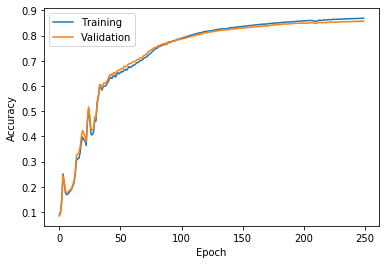

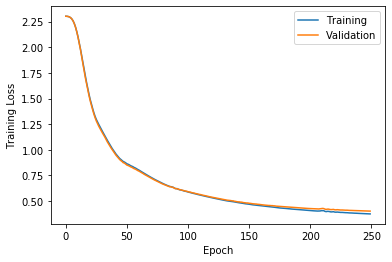

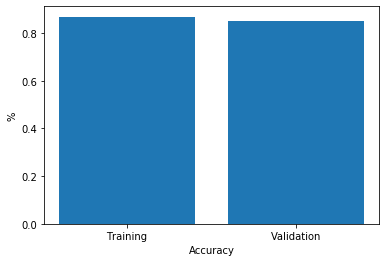

In [3]:
DEFAULT_NUM_EPOCHS = 250

class NN():
  NUM_OUTPUT_LAYERS = 10

  def __init__(self, num_input_neurons, num_epochs=DEFAULT_NUM_EPOCHS):
    self.num_epochs = num_epochs
    self.n1         = num_input_neurons
    self.n2         = 300
    self.n3         = 100
    self.optimizer = tf.keras.optimizers.Adam()

    # creating initial weights and biases for layer 1
    self.weights_L1 = tf.Variable(tf.random.normal([self.n2, self.n1], mean=0.0, stddev=0.005), dtype=tf.float32)
    self.biases_L1  = tf.Variable(tf.zeros([self.n2,1]), dtype=tf.float32)

    # creating initial weights and biases for layer 2
    self.weights_L2 = tf.Variable(tf.random.normal([self.n3, self.n2], mean=0.0, stddev=0.005), dtype=tf.float32)
    self.biases_L2  = tf.Variable(tf.zeros([self.n3,1]), dtype=tf.float32)

    # creating initial weights and biases for output layer
    self.weights_OUT = tf.Variable(tf.random.normal([self.NUM_OUTPUT_LAYERS, self.n3], mean=0.0, stddev=0.005), dtype=tf.float32)
    self.biases_OUT  = tf.Variable(tf.zeros([self.NUM_OUTPUT_LAYERS,1]), dtype=tf.float32)

    # arrays tracking training progress
    self.debug_accuracy = []
    self.debug_loss     = []

  def forward_pass(self, x):
    """
    Used to pass the input data through all the layers
    In this case two ReLU and a Softmax layer
    """
    zero = tf.constant(0.0, dtype=tf.float32)

    # Layer 1
    #   Step 1: Multiply input with weights and add the bias
    A_L1 = tf.matmul(self.weights_L1, x) + self.biases_L1
    #   Step 2: Apply ReLU activation
    H_L1 = tf.math.maximum(A_L1, zero)

    # Layer 2
    #   Step 1: Multiply input with weights and add the bias
    A_L2 = tf.matmul(self.weights_L2, H_L1) + self.biases_L2
    #   Step 2: Apply ReLU activation
    H_L2 = tf.math.maximum(A_L2, zero)

    # Layer OUT
    #   Step 1: Multiply input with weights and add the bias
    A_OUT = tf.matmul(self.weights_OUT, H_L2) + self.biases_OUT
    #   Step 2: Apply Soft-Max activation
    T_OUT = tf.math.exp(A_OUT)  # element-wise computation of the exponential of A 
    T_sum = tf.math.reduce_sum(T_OUT, axis=0) # calculate the sum for averaging
    return tf.math.divide(T_OUT, T_sum) # element-wise division with the sum

  def calculate_accuracy(self, pred_y, y):
    """
    Used to calculate the accuracy of the model based on the 
    correctly predicted labels
    """
    # Get the indices of the largest value neuron for each data instance
    pred = tf.math.argmax(pred_y, 0)
    # Get the indices of the one-hot encoded lables for each data instance
    real = tf.math.argmax(y, 0)
    # Create an array with bool flags where the indices between predicted
    # and real showing which ones match
    match_array = tf.equal(pred, real)
    # Change bools to floats where True = 1.0 and False = 0.0 and sum up
    numCorrect = tf.reduce_sum(tf.cast(match_array, tf.float32))
    # Average the result based on the number of data instance
    accuracy = numCorrect/y.shape[1]
    return accuracy

  def cross_entropy(self, pred_y, y):
    """
    Used to calculate the average loss between the predicted and the real labels
    """
    # Clip the value of predicted data so it can never be 0 because of the log function
    pred_y = tf.clip_by_value(pred_y, 1e-10, 1.0)
    return (1/pred_y.shape[1]) * tf.math.reduce_sum(-tf.math.multiply(tf.math.log(pred_y),y))
  
  def debug_plot_accuracy_graph(self):
    plt.figure(1)
    plt.plot(self.debug_accuracy)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    plt.show()

  def debug_plot_train_loss_graph(self):
    plt.figure(2)
    plt.plot(self.debug_loss)
    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.legend(['Training', 'Validation'])
    plt.show()

  def debug_plot_accuracy_bar_graph(self, train_acc, test_acc):
    x = [0, 1]
    height = [train_acc, test_acc]
    plt.figure(3)
    plt.bar(x, height)
    plt.xticks(x, ('Training', 'Validation'))
    plt.xlabel('Accuracy')
    plt.ylabel('%')
    plt.show()

  def train(self, x, y, test_x, test_y):
    x_test_tens = tf.convert_to_tensor(test_x.T, dtype=tf.float32)
    y_test_tens = tf.convert_to_tensor(test_y.T, dtype=tf.float32)

    # split data into train and validation sets
    divider = x.shape[0] - int(x.shape[0] * 0.1)
    x_t = x[:divider,:]
    y_t = y[:divider,:]
    x_v = x[divider:, :]
    y_v = y[divider:, :]
    
    x_train_tens = tf.convert_to_tensor(x_t.T, dtype=tf.float32)
    y_train_tens = tf.convert_to_tensor(y_t.T, dtype=tf.float32)
    x_val_tens = tf.convert_to_tensor(x_v.T, dtype=tf.float32)
    y_val_tens = tf.convert_to_tensor(y_v.T, dtype=tf.float32)

    start_time = time.time()

    # Loop for number of epochs
    for e in range(self.num_epochs):
      # use gradient tape to record forward pass and loss function
      with tf.GradientTape() as tape:
        pred_y = self.forward_pass(x_train_tens)
        train_loss = self.cross_entropy(pred_y, y_train_tens)

      # cache the current accuracies. Do this before training so we see the result of the random values
      train_accuracy = self.calculate_accuracy(pred_y, y_train_tens)

      validation_pred_y = self.forward_pass(x_val_tens)
      validation_accuracy = self.calculate_accuracy(validation_pred_y, y_val_tens)
      validation_loss = self.cross_entropy(validation_pred_y, y_val_tens)
      
      self.debug_accuracy.append((train_accuracy, validation_accuracy))
      self.debug_loss.append((train_loss, validation_loss))

      # do backpropagation
      current_grad = tape.gradient(train_loss, [self.weights_L1, self.biases_L1, self.weights_L2, self.biases_L2, self.weights_OUT, self.biases_OUT])
      self.optimizer.apply_gradients(zip(current_grad, [self.weights_L1, self.biases_L1, self.weights_L2, self.biases_L2, self.weights_OUT, self.biases_OUT]))
      
      print('{:03d}: TRAINING Loss: {:.4f} Accuracy: {:.2f}%. VALIDATION Loss: {:.4f} Accuracy: {:.2f}%'.format(e, train_loss, train_accuracy*100.0, validation_loss, validation_accuracy*100.0))

    print('Training Completed in {:.2f} sec'.format((time.time()-start_time)))
    
    # Run test data through network
    test_pred_y = self.forward_pass(x_test_tens)
    test_accuracy = self.calculate_accuracy(test_pred_y, y_test_tens)
    test_loss = self.cross_entropy(test_pred_y, y_test_tens)
    print('TEST Loss: {:.4f}, Accuracy: {:.2f}%'.format(test_loss, test_accuracy*100.0))
    
    # plot relevant graphs
    self.debug_plot_accuracy_graph()
    self.debug_plot_train_loss_graph()
    self.debug_plot_accuracy_bar_graph(self.debug_accuracy[-1][0], test_accuracy)
    
nn = NN(tr_x.shape[1])
nn.train(tr_x, tr_y_hot, te_x, te_y_hot)
